In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import KFold
import torch
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
# !pip install gdown -U --no-cache-dir

import gdown

url = 'https://drive.google.com/drive/u/1/folders/15s4q-UX-OffTIxU_y0Y06SPYynXQmQxS'

gdown.download_folder(url)

Retrieving folder list


Processing file 1-6xgAzSmaXipj9CJi68JcE86IbbyvXrr data_debug.csv
Processing file 1-3gTltnv96HPVXyumbw9hT9BU6tgHgv8 data_debug.pkl
Processing file 1-4W7hE3EERAOJ0ocu7KPS8qzBbI5eDhI data_full.csv
Processing file 1--gL9W3Y9Oclw1BFxaTukCTuIHuQKTnj data_full.pkl
Processing file 1qD3yo05Es8T-aGjJQatVdAREtF-V82_R DATA-FULL from Zhicong.zip
Retrieving folder 1jSW5PpVXPiU6dEP18fmZZ0_b08cS_CHb Raw data
Processing file 1Lv10vWW2bpzhj3nKJou7MvAyTQBcvPIP 20210101-20221026 MISO Actual Energy Price.csv
Processing file 1kY7lZNcMuq_vWOJvAI6edtEVJm4sA5tS 20210101-20221026 MISO Day-Ahead Energy Price.csv
Processing file 1iNmC7b_KTV2oIUOlnHBQs6vUzoN3fMKi 20210101-20221026 MISO Forecasted Load.csv
Processing file 1Qj7N94FI6lkBoEH6nH_KWROed-dtkE1k 20210101-20221026 weather.csv
Processing file 1piBnR0jpb0kB4MgdAP3Dg-H_ur7MWITs 20221001-20221026 MISO Actual Energy Price.csv
Processing file 1Lc1KWJWR-6niPlTdnGs0nSrnkhjLpGaZ 20221001-20221026 MISO Day-Ahead Energy Price.csv
Processing file 11kEqpl8ZMjlJDkX-OLQy

Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1-6xgAzSmaXipj9CJi68JcE86IbbyvXrr
To: /content/dat/data_debug.csv
100%|██████████| 91.2k/91.2k [00:00<00:00, 10.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-3gTltnv96HPVXyumbw9hT9BU6tgHgv8
To: /content/dat/data_debug.pkl
100%|██████████| 177k/177k [00:00<00:00, 28.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-4W7hE3EERAOJ0ocu7KPS8qzBbI5eDhI
To: /content/dat/data_full.csv
100%|██████████| 2.36M/2.36M [00:00<00:00, 48.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1--gL9W3Y9Oclw1BFxaTukCTuIHuQKTnj
To: /content/dat/data_full.pkl
100%|██████████| 4.47M/4.47M [00:00<00:00, 35.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qD3yo05Es8T-aGjJQatVdAREtF-V82_R
To: /content/dat/DATA-FULL from Zhicong.zip
100%|██████████| 6.27M/6.27M [00:00<00:00, 53.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Lv10vWW2bpzhj3nKJou7Mv

['/content/dat/data_debug.csv',
 '/content/dat/data_debug.pkl',
 '/content/dat/data_full.csv',
 '/content/dat/data_full.pkl',
 '/content/dat/DATA-FULL from Zhicong.zip',
 '/content/dat/Raw data/20210101-20221026 MISO Actual Energy Price.csv',
 '/content/dat/Raw data/20210101-20221026 MISO Day-Ahead Energy Price.csv',
 '/content/dat/Raw data/20210101-20221026 MISO Forecasted Load.csv',
 '/content/dat/Raw data/20210101-20221026 weather.csv',
 '/content/dat/Raw data/20221001-20221026 MISO Actual Energy Price.csv',
 '/content/dat/Raw data/20221001-20221026 MISO Day-Ahead Energy Price.csv',
 '/content/dat/Raw data/20221001-20221026 MISO Forecasted Load.csv',
 '/content/dat/Raw data/20221001-20221026 weather.csv']

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# path_prefix = "drive/MyDrive/547 GroupCoding/Final Project/"

# path_prefix = "drive/MyDrive/" # remove this

# Data Cleaning & Visualization

## Missing value & Outliers

In [ ]:
# path = "dat/data_debug.csv"
# path = path_prefix + "dat/data_full.csv"
path = "dat/data_full.csv"
df = pd.read_csv(path)
df.iloc[:,:17].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15937 entries, 0 to 15936
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         15937 non-null  int64  
 1   Month        15937 non-null  int64  
 2   Day          15937 non-null  int64  
 3   Day of Week  15937 non-null  int64  
 4   Hour of Day  15937 non-null  int64  
 5   temp         15935 non-null  float64
 6   feelslike    15935 non-null  float64
 7   dew          15935 non-null  float64
 8   humidity     15935 non-null  float64
 9   precip       15935 non-null  float64
 10  precipprob   15935 non-null  float64
 11  preciptype   1733 non-null   object 
 12  snow         15935 non-null  float64
 13  snowdepth    15935 non-null  float64
 14  windgust     9268 non-null   float64
 15  windspeed    15935 non-null  float64
 16  winddir      15935 non-null  float64
dtypes: float64(11), int64(5), object(1)
memory usage: 2.1+ MB


In [ ]:
df.iloc[:,17:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15937 entries, 0 to 15936
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sealevelpressure     15933 non-null  float64
 1   cloudcover           15935 non-null  float64
 2   visibility           15935 non-null  float64
 3   solarradiation       15935 non-null  float64
 4   solarenergy          9331 non-null   float64
 5   uvindex              15935 non-null  float64
 6   severerisk           6953 non-null   float64
 7   Price.ARKANSAS.HUB   12017 non-null  float64
 8   Price.INDIANA.HUB    12015 non-null  float64
 9   Price.LOUISIANA.HUB  12015 non-null  float64
 10  Price.MICHIGAN.HUB   12015 non-null  float64
 11  Price.MINN.HUB       12015 non-null  float64
 12  Price.MS.HUB         12015 non-null  float64
 13  Price.TEXAS.HUB      12015 non-null  float64
 14  Price.Day-Ahead      15913 non-null  float64
 15  Forecast_load        15933 non-null 

### All weather info have at least two NaN.

In [ ]:
df[df['temp'].isna()]

,Year,Month,Day,Day of Week,Hour of Day,temp,feelslike,dew,humidity,precip,...,Price.ARKANSAS.HUB,Price.INDIANA.HUB,Price.LOUISIANA.HUB,Price.MICHIGAN.HUB,Price.MINN.HUB,Price.MS.HUB,Price.TEXAS.HUB,Price.Day-Ahead,Forecast_load,Price.ILLINOIS.HUB
15935,2022,3,13,6,2,NaN,NaN,NaN,NaN,NaN,...,53.66,87.20,55.83,59.38,19.58,52.22,55.95,27.83,74709.0,11.29
15936,2021,3,14,6,2,NaN,NaN,NaN,NaN,NaN,...,29.55,19.53,15.07,19.37,-4.62,12.89,31.31,17.73,57430.0,18.87


In [ ]:
df.sort_values(by=['Year','Month',"Day",'Hour of Day'],inplace=True,ignore_index=True)
df.reset_index(inplace=True,drop=True)
np.where(df['temp'].isna())


(array([ 1730, 10467]),)

In [ ]:
df

,Year,Month,Day,Day of Week,Hour of Day,temp,feelslike,dew,humidity,precip,...,Price.ARKANSAS.HUB,Price.INDIANA.HUB,Price.LOUISIANA.HUB,Price.MICHIGAN.HUB,Price.MINN.HUB,Price.MS.HUB,Price.TEXAS.HUB,Price.Day-Ahead,Forecast_load,Price.ILLINOIS.HUB
0,2021,1,1,4,0,26.7,14.1,22.9,85.41,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.82,69525.0,NaN
1,2021,1,1,4,1,27.8,16.5,23.0,82.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.90,66890.0,NaN
2,2021,1,1,4,2,28.0,16.6,24.1,85.23,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.73,64993.0,NaN
3,2021,1,1,4,3,28.8,16.9,25.0,85.37,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.02,63753.0,NaN
4,2021,1,1,4,4,28.8,16.2,26.0,89.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.11,62889.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15932,2022,10,26,2,19,46.0,42.6,37.1,70.85,0.0,...,45.62,48.85,46.28,47.78,46.93,46.51,46.16,64.85,72365.0,47.3
15933,2022,10,26,2,20,41.4,37.1,35.3,78.89,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.52,NaN,NaN
15934,2022,10,26,2,21,42.1,38.5,36.0,78.80,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.47,NaN,NaN
15935,2022,10,26,2,22,43.6,43.6,35.9,74.35,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.01,NaN,NaN


In [ ]:
df.loc[1730,['temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk']] = (df.loc[1730,['temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk']].ffill() + df.loc[1730,['temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk']].bfill())/2
df.loc[10467,['temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk']] = (df.loc[1730,['temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk']].ffill() + df.loc[1730,['temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk']].bfill())/2

It seems that the weather station is under maintenance at 2:00 a.m. on the second Saturday in March every year. Fill with the average of the closest records.

### Precipitation type

In [ ]:
df['preciptype'].value_counts()

rain                     1480
snow                      141
rain,snow                  80
freezingrain               24
ice                         5
snow,ice                    1
freezingrain,snow,ice       1
freezingrain,snow           1
Name: preciptype, dtype: int64

The "precipitation type" feature has 8 categorical values, we can apply one hot encoding on it.

In [ ]:
df_preciptype = pd.get_dummies(df['preciptype'],prefix="PrecipType")
df_preciptype.drop("PrecipType_freezingrain,snow,ice",axis=1,inplace=True)

### windgust

In [ ]:
df[df['windgust'].isna()]['windspeed']

0        16.9
1        14.3
13       17.8
14       14.5
15       12.4
         ... 
8979      5.8
8980      8.1
8981      8.1
8982      5.8
10467     NaN
Name: windspeed, Length: 6669, dtype: float64

Wind gust means a brief increase in the speed of the wind. Considering the semantics, we treat NaN as 0.

In [ ]:
df['windgust'].fillna(0,inplace=True)

### Sea Level Pressure

In [ ]:
# Find the position of NaN.
np.where(df['sealevelpressure'].isna())

(array([  829,  1377,  1730, 10467]),)

In [ ]:
print(df.loc[825:835,'sealevelpressure'].values)
print(df.loc[1372:1382,'sealevelpressure'].values)

[1007.  1004.5 1002.1 1001.2    nan  997.   996.2  996.2  996.4  998.2
 1000.7]
[1013.6 1014.6 1015.7 1016.4 1017.     nan 1019.1 1019.1 1019.2 1018.6
 1018.2]


The missing value is in the middle of the uphill or downhill. Fill it with the average between the two neighbors.

In [ ]:
df['sealevelpressure'] = (df['sealevelpressure'].ffill()+df['sealevelpressure'].bfill())/2

### Solar Energy

In [ ]:
df[df['solarenergy'].isna()]['Hour of Day'].value_counts()

0     652
1     651
3     651
4     651
22    651
2     648
23    645
5     556
21    541
20    338
6     263
19    234
18    123
17      1
7       1
Name: Hour of Day, dtype: int64

Notice that the NaN in solarenergy appears in the evening, night and early morning. So fill with 0.

In [ ]:
df['solarenergy'].fillna(0,inplace=True)

### Severe risk

In [ ]:
df[df['severerisk'].isna()]['Year'].value_counts()

2021    8761
2022     223
Name: Year, dtype: int64

In [ ]:
df['severerisk'].value_counts()

10.0     5769
30.0      314
5.0       230
3.0       208
60.0      149
100.0      96
75.0       79
15.0       45
8.0        43
19.0        7
38.0        7
25.0        3
50.0        3
Name: severerisk, dtype: int64

The severe risk value is missing for the whole year of 2021. we decide to drop this feature.

In [ ]:
df.drop(['severerisk'],axis=1,inplace=True)

### Actual Price of States (UNSOLVED)

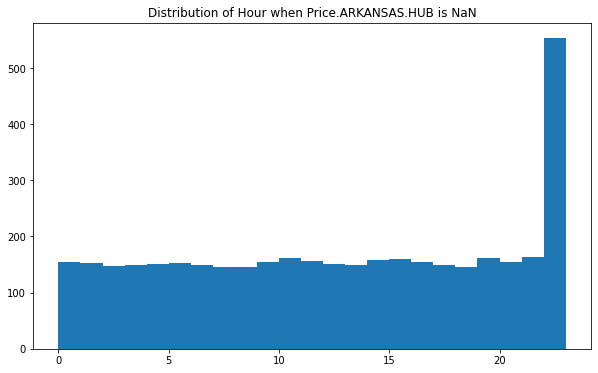

In [ ]:
rcParams['figure.figsize'] = 10,6
plt.hist(df[df['Price.ARKANSAS.HUB'].isna()]["Hour of Day"],bins=np.arange(0,24))
plt.title("Distribution of Hour when Price.ARKANSAS.HUB is NaN")
plt.show()

In [ ]:
def plot_price_feature(feature):
    x = df[df['Price.ARKANSAS.HUB'].isna()&df['Hour of Day']!=23][feature].value_counts().index
    y = df[df['Price.ARKANSAS.HUB'].isna()&df['Hour of Day']!=23][feature].value_counts().values
    plt.scatter(x,y)
    plt.xticks(df[df['Price.ARKANSAS.HUB'].isna()&df['Hour of Day']!=23][feature].value_counts().index)
    plt.title("Distribution of %s when Price.ARKANSAS.HUB is NaN" %feature)
    plt.show()

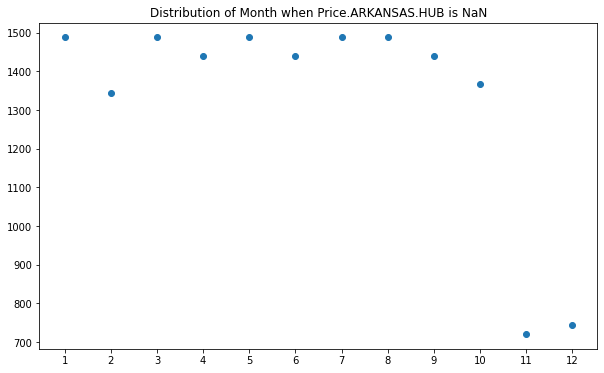

In [ ]:
plot_price_feature("Month")

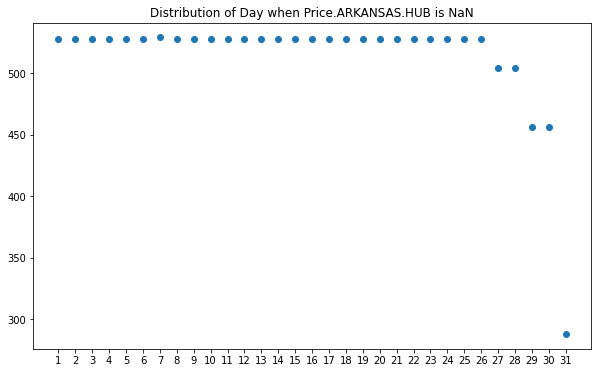

In [ ]:
plot_price_feature("Day")

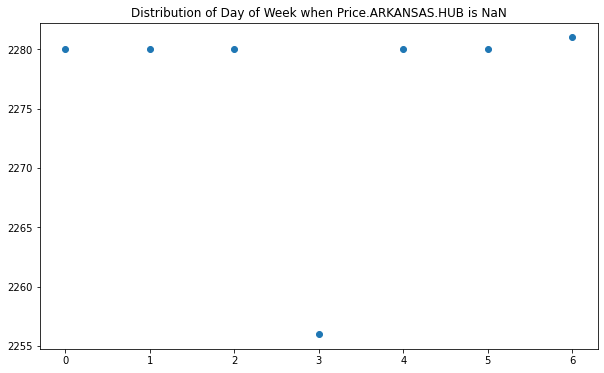

In [ ]:
plot_price_feature("Day of Week")

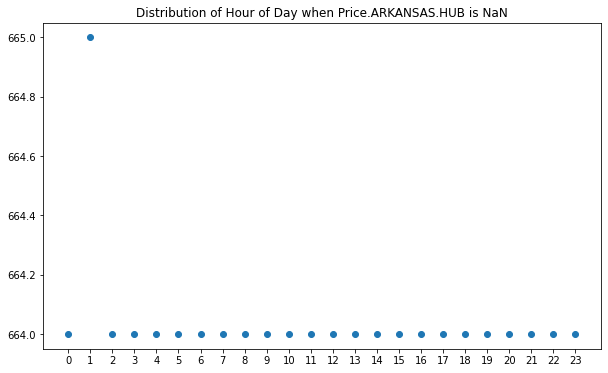

In [ ]:
plot_price_feature("Hour of Day")

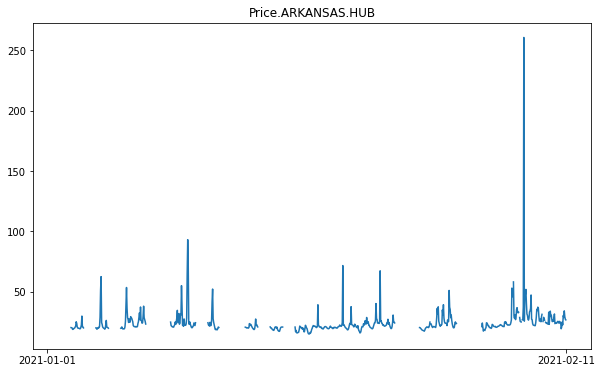

In [ ]:
plt.plot(df.loc[:1000,'Price.ARKANSAS.HUB'])
plt.xticks([0,1000],["2021-01-01",'2021-02-11'])
plt.title("Price.ARKANSAS.HUB")
plt.show()

The Actual Price of states evenly lacks of a portion of data. The missing values are not predictable. So we decide to drop it directly.

### Price.Day-Ahead

In [ ]:
df[df['Price.Day-Ahead'].isna()].iloc[:,:5]

,Year,Month,Day,Day of Week,Hour of Day
8233,2021,12,10,4,0
8234,2021,12,10,4,1
8235,2021,12,10,4,2
8236,2021,12,10,4,3
8237,2021,12,10,4,4
8238,2021,12,10,4,5
8239,2021,12,10,4,6
8240,2021,12,10,4,7
8241,2021,12,10,4,8
8242,2021,12,10,4,9


In [ ]:
def plot_pda_weekly(n):
    # plot Price.Day-Ahead of n-th week starting from 2021-01-01.
    offset = 24*4
    data = df['Price.Day-Ahead'].loc[offset+24*7*(n-1):offset+24*7*(n)]
    plt.plot(data)
    plt.xticks([i*24 + 24*7*(n-1)+offset for i in range(7)],[i for i in range(1,8)])
    plt.title("Price.Day-Ahead of %d-th week starting from 2021-01-01."%n)
    plt.show()

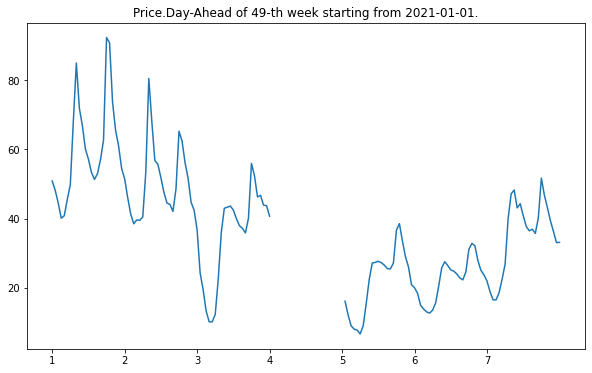

In [ ]:
plot_pda_weekly(49)

By looking at the plot week by week, we find that the Price Day-Ahead has a periodic pattern with day as unit and the pattern of Thursday is similar to the pattern of Friday. So we find the polynomial of the Price Day-Ahead from Friday and simulate the values of Thursday.

In [ ]:
df.index[df['Price.Day-Ahead'].isna()]

Int64Index([8233, 8234, 8235, 8236, 8237, 8238, 8239, 8240, 8241, 8242, 8243,
            8244, 8245, 8246, 8247, 8248, 8249, 8250, 8251, 8252, 8253, 8254,
            8255, 8256],
           dtype='int64')

In [ ]:
pda_Friday = df.loc[8257:8257+24,"Price.Day-Ahead"]
pda_Friday

param = np.polyfit(np.arange(0,25),pda_Friday,deg=9)
param

array([-1.24405896e-07,  1.33024042e-05, -5.86586824e-04,  1.37448588e-02,
       -1.83727197e-01,  1.39840070e+00, -5.75072844e+00,  1.19189882e+01,
       -1.25022670e+01,  1.63167060e+01])

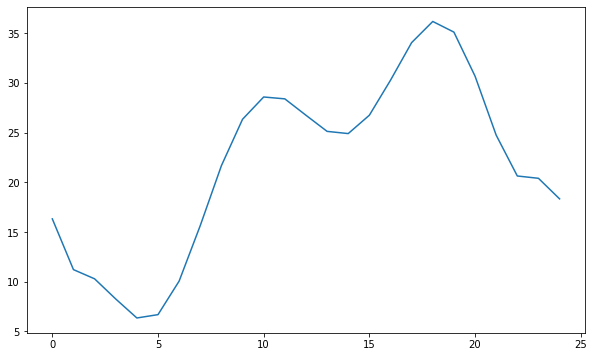

In [ ]:
plt.plot(np.arange(0,25),np.polyval(param,np.arange(0,25)))

In [ ]:
df.loc[8233,'Price.Day-Ahead']= np.mean([df.loc[8233-24,'Price.Day-Ahead'],df.loc[8233+24,'Price.Day-Ahead']])
param[-1] = param[-1] + df.loc[8233,'Price.Day-Ahead'] - df.loc[8257,'Price.Day-Ahead']
param 

array([-1.24405896e-07,  1.33024042e-05, -5.86586824e-04,  1.37448588e-02,
       -1.83727197e-01,  1.39840070e+00, -5.75072844e+00,  1.19189882e+01,
       -1.25022670e+01,  2.03817060e+01])

In [ ]:
fill_val = np.polyval(param,np.arange(0,25))
df.loc[8233:8257,'Price.Day-Ahead'] = fill_val


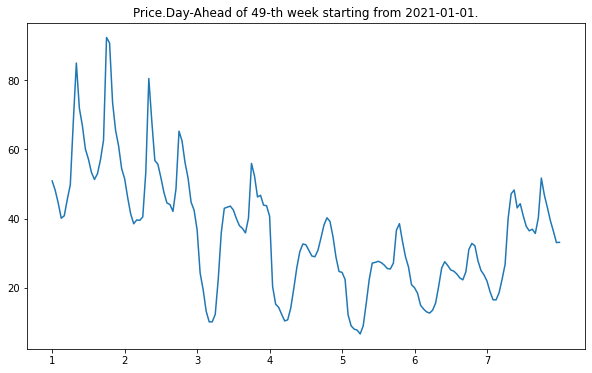

In [ ]:
plot_pda_weekly(49)

### Finalize

In [ ]:
df = df.join(df_preciptype,)
df.drop(columns=["preciptype"],inplace=True)
df = df.reindex(columns=['Year', 'Month', 'Day', 'Day of Week', 'Hour of Day', 'temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'PrecipType_freezingrain',
       'PrecipType_freezingrain,snow', 'PrecipType_ice', 'PrecipType_rain', 
       'PrecipType_rain,snow','PrecipType_snow', 'PrecipType_snow,ice', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 
       'Price.ARKANSAS.HUB', 'Price.INDIANA.HUB', 'Price.LOUISIANA.HUB',
       'Price.MICHIGAN.HUB', 'Price.MINN.HUB', 'Price.MS.HUB',
       'Price.TEXAS.HUB', 'Price.Day-Ahead', 'Forecast_load',
       'Price.ILLINOIS.HUB'])

In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
df = df.astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12013 entries, 0 to 12012
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          12013 non-null  float32
 1   Month                         12013 non-null  float32
 2   Day                           12013 non-null  float32
 3   Day of Week                   12013 non-null  float32
 4   Hour of Day                   12013 non-null  float32
 5   temp                          12013 non-null  float32
 6   feelslike                     12013 non-null  float32
 7   dew                           12013 non-null  float32
 8   humidity                      12013 non-null  float32
 9   precip                        12013 non-null  float32
 10  precipprob                    12013 non-null  float32
 11  PrecipType_freezingrain       12013 non-null  float32
 12  PrecipType_freezingrain,snow  12013 non-null  float32
 13  P

## Linear Correlation

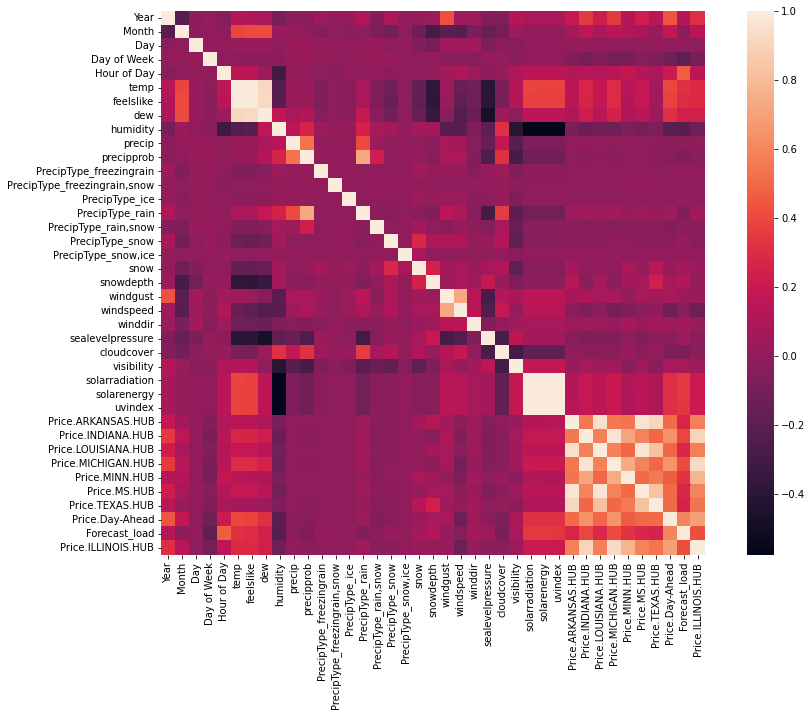

In [ ]:
rcParams['figure.figsize'] = 15,10
sns.heatmap(df.corr(),square=True)

From the correlation heatmap, we can see that </br>
['temp','feelslike'] </br>
['solarradiation','solarenergy','uvindex']</br>
['Price.LOUISIANA.HUB','Price.ARKANSAS.HUB','Price.MS.HUB']</br>
['Price.INDIANA.HUB','Price.MICHIGAN.HUB'] </br>
have very high positive correlation. So we only keep one from each group.

In [ ]:
df.drop(['Price.LOUISIANA.HUB','Price.ARKANSAS.HUB','feelslike','solarradiation','uvindex','Price.MICHIGAN.HUB'],axis=1,inplace=True)

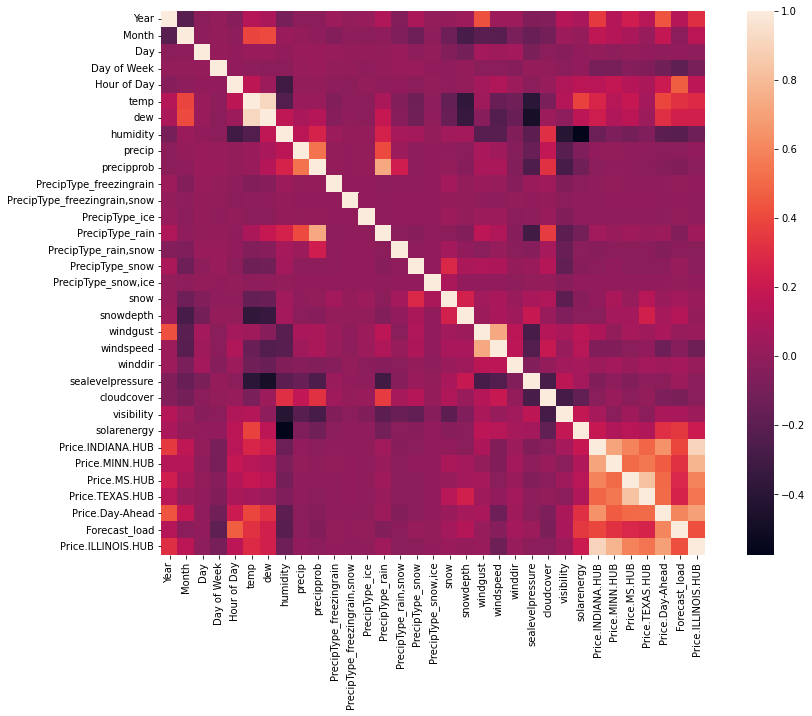

In [ ]:
sns.heatmap(df.corr(),square=True)

# Linear regression with pytorch

We shall also use numpy for linear regression, this part is the code skeleton for future implementation of RNN

## Dataset, Dataloader, and KFold

In [ ]:
class LMP_Dataset(torch.utils.data.Dataset):
    def __init__(self, Data, Label):
        self.Data = Data.astype(np.float32).values
        if Label.ndim==1:
            self.Label = np.expand_dims(Label, 0).astype(np.float32).reshape(-1,1)
        else:
            self.Label = Label.astype(np.float32).reshape(-1,1)

    def __len__(self):
        return self.Data.shape[0]

    def __getitem__(self, idx):
        data_tensor = torch.tensor(self.Data[idx])
        label_tensor = torch.tensor(self.Label[idx])
        return data_tensor,label_tensor


def prep_data(df,kfold_switch=False,n_splits=10):
    if kfold_switch:
        splits=KFold(n_splits=n_splits,shuffle=False)
        dataloader_list = []
        for (train_idx,test_idx) in splits.split(df):
            train_dataset = LMP_Dataset(df.iloc[train_idx,:-1],df.iloc[train_idx,-1])
            test_dataset = LMP_Dataset(df.iloc[test_idx,:-1],df.iloc[test_idx,-1])

            train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 24*7*4, shuffle=True, drop_last=True)        # Shuffle?
            test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 24*7*4, shuffle=True, drop_last=True)

            dataloader_list.append((train_loader,test_loader))
        return dataloader_list

    feature_train, feature_test, label_train, label_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.3,shuffle=True, random_state=39)      # Shuffle?
    train_dataset = LMP_Dataset(feature_train, label_train)
    test_dataset = LMP_Dataset(feature_test, label_test)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 24*7*4, shuffle=True, drop_last=True)        # Shuffle?
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 24*7*4, shuffle=True, drop_last=True)
    return (train_loader,test_loader)


## Models

In [ ]:
class Single_Linear_Net(torch.nn.Module):
    def __init__(self,inputSize=32):
        super(Single_Linear_Net,self).__init__()
        self.inputSize = inputSize
        self.outputSize = 1

        self.ll = torch.nn.Linear(self.inputSize,self.outputSize)

    def forward(self,x):
        out = self.ll(x)
        return out
    
    def reset_weights(self):
        self.ll.reset_parameters()


## Train test methods

In [ ]:
def train_model (model,epochs,dataloader,criterion,optimizer,verbose=True):
    losses=[]
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_feature, batch_label in dataloader:
            optimizer.zero_grad()
            prediction = model(batch_feature)
            loss = criterion(prediction, batch_label)

            # Add L2 Regression
            l2_lambda = 0.01
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            loss = loss+l2_lambda*l2_norm

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
        losses.append(epoch_loss/len(dataloader))
        if verbose and epoch%(epochs/10)==0:
            print('[TRAIN]\t Epoch: {:2d}\t Loss: {:.4f}'.format(epoch+1, epoch_loss/len(dataloader)))
    print("Model Trained!\n")
    return losses
    
def train_model_kfold(model,epochs,dataloader_list,criterion,optimizer,verbose=True):
    for fold, (train_loader,_) in enumerate(dataloader_list):
        if verbose:
            print("Fold %d: " %(fold+1))
        model.reset_weights()
        losses = train_model(model,epochs,train_loader,criterion,optimizer)

In [ ]:
def train_eval_model(model,epochs,train_loader,test_loader,criterion,optimizer):
    train_losses=[]
    test_losses=[]
    for epoch in tqdm(range(epochs)):
        train_epoch_loss = 0
        test_epoch_loss=0
        model.train()
        for batch_feature, batch_label in train_loader:
            optimizer.zero_grad()
            prediction = model(batch_feature)
            loss = criterion(prediction, batch_label)
            if epoch>0:
                loss.backward()
                optimizer.step()
            train_epoch_loss += loss.item()
        train_losses.append(train_epoch_loss/len(train_loader))
        model.eval()
        with torch.no_grad():
            for batch_feature, batch_label in test_loader:
                prediction = model(batch_feature)
                loss = criterion(prediction, batch_label)
                test_epoch_loss += loss.item()
            test_losses.append(test_epoch_loss/len(test_loader))

    rcParams['figure.figsize'] = 10,8
    plt.plot(np.log(train_losses),label='Train')
    plt.plot(np.log(test_losses),label="Test")
    plt.title("Loss for %d epochs (log scale)" %epochs)
    plt.legend()
    plt.show()

    

## Results

In [ ]:
mse_loss = torch.nn.MSELoss()
criterion = lambda x, y: mse_loss(x/1e5, y/1e5)

In [ ]:
# Try normal train test split.
ll_model = Single_Linear_Net()
optimizer = torch.optim.SGD(ll_model.parameters(),lr=1e-1)
epochs = 100
train_loader,test_loader = prep_data(df)
losses = train_model(ll_model,epochs,train_loader,criterion,optimizer)

[TRAIN]	 Epoch:  1	 Loss: 0.0044
[TRAIN]	 Epoch: 11	 Loss: 0.0023
[TRAIN]	 Epoch: 21	 Loss: 0.0014
[TRAIN]	 Epoch: 31	 Loss: 0.0009
[TRAIN]	 Epoch: 41	 Loss: 0.0005
[TRAIN]	 Epoch: 51	 Loss: 0.0003
[TRAIN]	 Epoch: 61	 Loss: 0.0002
[TRAIN]	 Epoch: 71	 Loss: 0.0001
[TRAIN]	 Epoch: 81	 Loss: 0.0001
[TRAIN]	 Epoch: 91	 Loss: 0.0000
Model Trained!



In [ ]:
# Try Kfold
ll_model = Single_Linear_Net()
optimizer = torch.optim.SGD(ll_model.parameters(),lr=0.1)
epochs = 100
dataloader_list = prep_data(df,True,3)
train_model_kfold(ll_model,epochs,dataloader_list,criterion,optimizer)

Fold 1: 
[TRAIN]	 Epoch:  1	 Loss: 0.0103
[TRAIN]	 Epoch: 11	 Loss: 0.0022
[TRAIN]	 Epoch: 21	 Loss: 0.0014
[TRAIN]	 Epoch: 31	 Loss: 0.0009
[TRAIN]	 Epoch: 41	 Loss: 0.0006
[TRAIN]	 Epoch: 51	 Loss: 0.0004
[TRAIN]	 Epoch: 61	 Loss: 0.0002
[TRAIN]	 Epoch: 71	 Loss: 0.0002
[TRAIN]	 Epoch: 81	 Loss: 0.0001
[TRAIN]	 Epoch: 91	 Loss: 0.0001
Model Trained!

Fold 2: 
[TRAIN]	 Epoch:  1	 Loss: 0.0042
[TRAIN]	 Epoch: 11	 Loss: 0.0024
[TRAIN]	 Epoch: 21	 Loss: 0.0015
[TRAIN]	 Epoch: 31	 Loss: 0.0010
[TRAIN]	 Epoch: 41	 Loss: 0.0006
[TRAIN]	 Epoch: 51	 Loss: 0.0004
[TRAIN]	 Epoch: 61	 Loss: 0.0003
[TRAIN]	 Epoch: 71	 Loss: 0.0002
[TRAIN]	 Epoch: 81	 Loss: 0.0001
[TRAIN]	 Epoch: 91	 Loss: 0.0001
Model Trained!

Fold 3: 
[TRAIN]	 Epoch:  1	 Loss: 0.0095
[TRAIN]	 Epoch: 11	 Loss: 0.0019
[TRAIN]	 Epoch: 21	 Loss: 0.0012
[TRAIN]	 Epoch: 31	 Loss: 0.0008
[TRAIN]	 Epoch: 41	 Loss: 0.0005
[TRAIN]	 Epoch: 51	 Loss: 0.0003
[TRAIN]	 Epoch: 61	 Loss: 0.0002
[TRAIN]	 Epoch: 71	 Loss: 0.0001
[TRAIN]	 Epoch: 8

100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


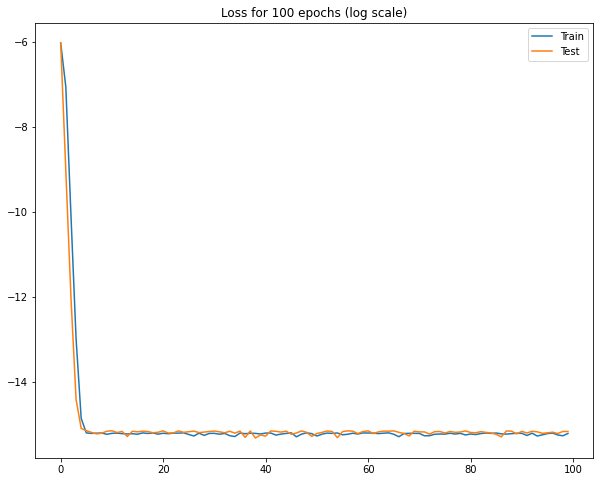

In [ ]:
# Train and test simultaneously
ll_model = Single_Linear_Net()
optimizer = torch.optim.SGD(ll_model.parameters(),lr=1e-1)
epochs = 100
train_loader,test_loader = prep_data(df)
train_eval_model(ll_model,epochs,train_loader,test_loader,criterion,optimizer)

<!-- We first tried running the model with 300 epochs.The learning curve shows that the model converges at about 75 epochs. The huge fluctuation tail is probably because the parameters are jumping back and forth around the minima, however, adding l2 regularization does not fix the problem. We also tried running the model with more epochs(1000). The problem still remains.</br> -->
<!-- Therefore, we decide to use numpy build-in linear regression model. -->

Note: the losses in the above code blocks are MSE losses on rescaled labels (we simply divide by 1e5)

The above code is simply the skeleton for future implementation of RNN. In the next section we shall perform linear regression with numpy.

# Linear regression with numpy

In [ ]:

def prep_np_data(df,kfold_switch=False,n_splits=10):
    def to_np_pair(features, labels):
        features = features.astype(np.float32).values
        features = np.hstack([features, np.ones((features.shape[0], 1))])
        if labels.ndim==1:
            labels = np.expand_dims(labels, 0).astype(np.float32).reshape(-1,1)
        else:
            labels = labels.astype(np.float32).reshape(-1,1)
        return features, labels

    if kfold_switch:
        splits=KFold(n_splits=n_splits,shuffle=False)
        ret_list = []
        for (train_idx,test_idx) in splits.split(df):
            ret_list.append((
                to_np_pair(df.iloc[train_idx,:-1],df.iloc[train_idx,-1]),
                to_np_pair(df.iloc[test_idx,:-1],df.iloc[test_idx,-1])
            ))
        return ret_list

    feature_train, feature_test, label_train, label_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.3,shuffle=True, random_state=39)      # Shuffle?
    return (to_np_pair(feature_train, label_train),
            to_np_pair(feature_test, label_test))

Split data into train-test split; run linear regression on train set and evaluate on test set

In [ ]:
# Try normal train test split
train_dat, test_dat = prep_np_data(df)

weights = np.linalg.lstsq(*train_dat, rcond=None)[0]
train_mse = np.mean((np.dot(train_dat[0], weights) - train_dat[1])**2)
print('MSE on train dataset', train_mse)
test_mse = np.mean((np.dot(test_dat[0], weights) - test_dat[1])**2)
print('MSE on test dataset', test_mse)

MSE on train dataset 228.09296917150792
MSE on test dataset 206.10938769421986


Split data into k-fold train-test split

For each fold run linear regression on train set and evaluate on test set

In [ ]:
# Try Kfold
dat_list = prep_np_data(df,True,3)
for i, (train_dat, test_dat) in enumerate(dat_list):
    weights = np.linalg.lstsq(*train_dat, rcond=None)[0]
    train_mse = np.mean((np.dot(train_dat[0], weights) - train_dat[1])**2)
    test_mse = np.mean((np.dot(test_dat[0], weights) - test_dat[1])**2)
    print('Fold %d:' % (i+1), 
          'train MSE %f;' % train_mse, 
          'test MSE %f' % test_mse)


Fold 1: train MSE 256.908948; test MSE 320.811456
Fold 2: train MSE 171.381858; test MSE 377.913180
Fold 3: train MSE 207.116130; test MSE 285.540244


The model is a little overfitting now. We'll take loss=285 as our benchmark. Next step, we will move to construct powerful models, i.e. RNN.